**Описание проекта**

Представим, что я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Данные что нам предоставили включают в себя игры до 2016 года. Сейчас декабрь 2016 г., и необходимо спланировать компанию на 2017-й. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Описание данных**

•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).



## Шаг 1. Открываем файл с данными и изучаем общую информацию

In [1]:
#Загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st
import re

In [2]:
#Открываем массив
data = pd.read_csv('/datasets/games.csv')

In [3]:
#Взгялнем на наш массив
(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Размер массива
data.shape[0]

16715

In [6]:
#Никогда не будет лишним взглянуть на цифры под таким углом
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:**

1) Датасет представляет таблицу размером 16715 на 11

2) Очень много пропусков в столбце "Critic_Score". Пока объяснений этому нет

3) Очень много нулевых значений (взгляните на таблицу выше, продажи в США, Европе, Японии и мире - 1 квантель ровна 0. А так же 2-я и 3-я квантели выглядят неправдопобно мало)

4) Необходимо заменить тип данных в столбцах "Year_of_Release" и "Critic_Score" на int. В столбце "User_Score" изменить на float.

5) Для удобства и стиля приведем названия столбцов к нижнему регистру.

## Шаг 2. Подготовим данные

### Приведем название столбцов к нижнему регистру

In [7]:
data.columns = data.columns.str.lower()
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [8]:
#Взлянем на уникальные рейтинги
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**По информации из интеренета, можем составить следующий список рейтинга:**

E (первоначально K-A) - everyone

M - mature

T - teen

E10+ - everyone 10 and older

AO - adults only 18

EC - early childhood

RP - reiting pending


In [9]:
#Уникальные платформы
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Судя по списку, представлены все известные игровые консоли, в том числе и персональный компьютер. Каких-то не существующих консолей не видно.

### Обработка пропусков и дубликатов

In [10]:
#Посчитаем нулевые значения
data['name'].isnull().sum()

2

In [11]:
#Вывидим на экран их
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Делаю вывод что эти 2 строчки можно удалить, так как в них фактически отсвует информацию что бы как то индитифицировать игру.

In [12]:
#Удаляем пропуски
data.dropna(subset = ['name'], inplace = True)
data.reset_index(drop = True, inplace = True)

In [13]:
#Часто будем смотреть на эту информацию, для отлеживания процесса.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [14]:
#Количество пропусков в столбце "год выпуска игры"
data['year_of_release'].isna().sum()

269

In [15]:
round (data['year_of_release'].isna().sum()/data['year_of_release'].shape[0] * 100, 2)

1.61

Получается что от всего объема данных только в 1,61% не указан год релиза. Принимаю решение удалить эти данные

In [16]:
#Удаляем пропуски
data = data[data['year_of_release'].notna()]
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


**Переходим к пропускам в "critic_score" и "user_score".**

В "critic_score" заменить значения не получиться, так как оценки индивидуальны для каждой игры. Здесь нельзя воспользоваться методом замены средней или медианной оценки. Можно только заменить тип даных.

Из документации к данным известно что столбец "user_score" содержит аббревиатуру 'tbd'. В интеренете сказано что это недостаточное количество оценок для выставления общей оценки.

Предлагаю их заменить на NaN для лучше обработки.

In [18]:
#Меняем тип данных
data['critic_score'] = data['critic_score'].astype('Int64')

In [19]:
#Заменяем значение
data['user_score'] = data['user_score'].replace({'tbd':np.NaN})
#Сразу заменим тип данных
data['user_score'] = data['user_score'].astype('float')
#Проверяем замену
data['user_score'].sort_values().unique()


array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

**Пропуски в "rating"**

Ранее мы выяснили уникальные значения столбца возрастной рейтинг. Заменить их тоже фактически не возможно, так как у каждой игры свой возрастной рейтинг.

In [20]:
#Количество пропусков в столбце "рейтинг"
data['rating'].isna().sum()

6676

In [21]:
#Количество дубликатов
data.duplicated().sum()

0

Явных дубликатов не обнаруженно, по этому удалять нечего.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


### И последнее что надо сделать, это посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [23]:
#добавляем новый стобец с суммой всех продаж по регионам
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display (data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31


**Вывод**

1) Для удобства и стиля привели названия столбцов к нижнему регистру.

2) Удалили 2 строки которые невозможно восстановить по причине отсутствия какой либо информации в них, а так же удалили 269 строчек (1,6% от общего количества данных) по причине отсутсвия года релиза игры.

3) Заменили аббревиатуру 'tbd' на NaN так как она означает что это недостаточное количество оценок для выставления общей оценки.

4) Заменили типы даннах в столбцах где это было необходимо.

5) После проделаных мутаций с датасетом, дубликатов не выявлено. 

## Шаг 3. Проводим исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Насколько важны данные за все периоды.

In [24]:
#Создаем сводную таблицу
years_games = pd.pivot_table(data, index = 'year_of_release', values = 'name', aggfunc = 'count')
years_games.columns = ['number of games']
years_games.describe()

,number of games
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


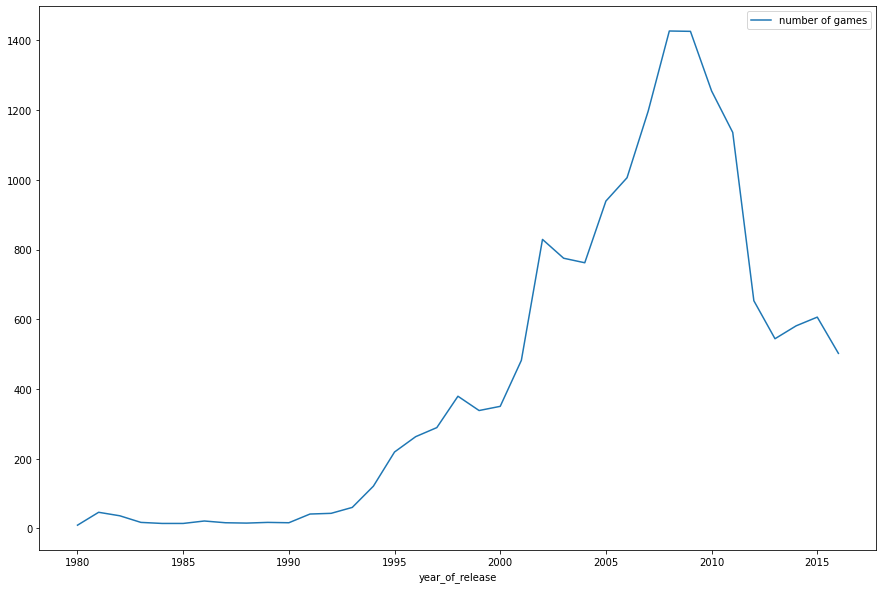

In [25]:
#Строим график для наглядности
years_games.plot(figsize = (15, 10))
plt.show()

**Вывод**

Как видно из графика, до 1990 года игр выпускалось не много. Далее идет существенный подъем, массового выпускаются игры вплоть до 2008 года (думаю кризис 2008 года сильно повлеял на индуствию в целом). Далее идет спад, но количество выпускаемых игр не опускалось ниже 400.

Учитывая количество выпускаемых игр до 1990 года включительно, делаю вывод что эти данные не важны за этот период.

Теперь посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Дадим ответ на вопрос: "За какой характерный срок появляются новые и исчезают старые платформы?"

In [26]:
#Построим сводную таблицу
total_sales = pd.pivot_table(data, index =['platform'], values = 'all_sales', aggfunc = 'sum')
total_sales = total_sales.sort_values('all_sales', ascending = False)
display (total_sales)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [27]:
#Выведем на экран топ 7 платформ
top_7_platforms = list(total_sales.index[:7])
top_7_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

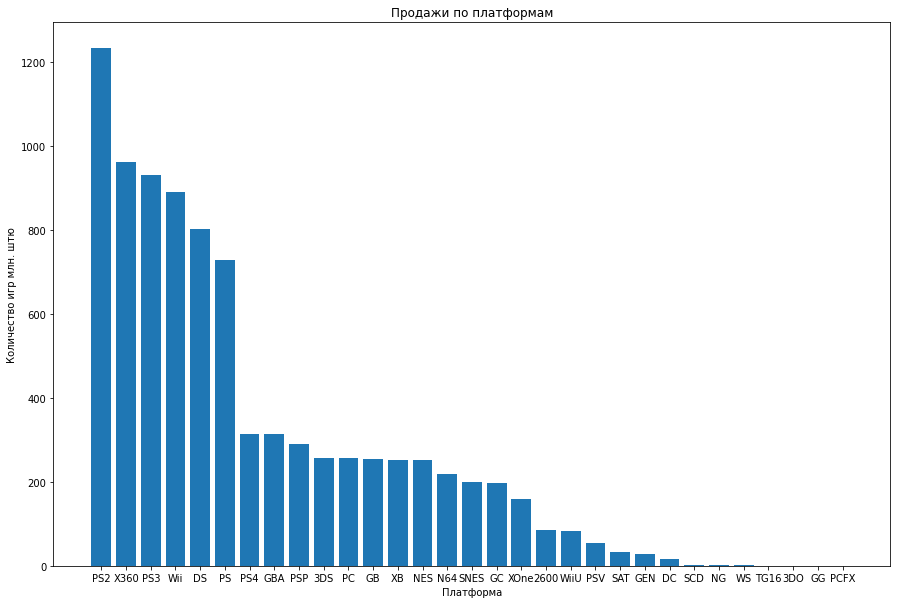

In [28]:
plt.figure(figsize = (15, 10))
plt.bar(total_sales.index, total_sales['all_sales'])
plt.title('Продажи по платформам')
plt.xlabel ('Платформа');
plt.ylabel ('Количество игр млн. штю');

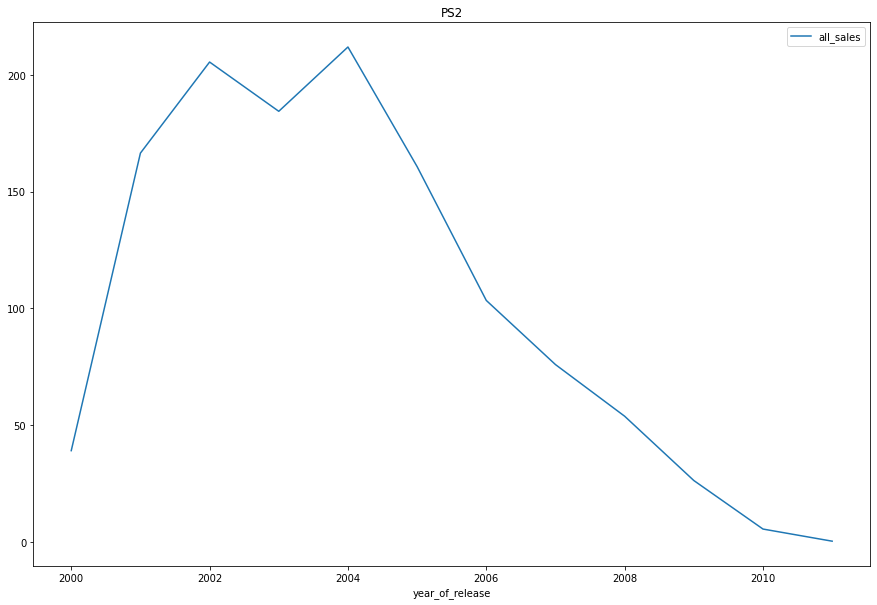

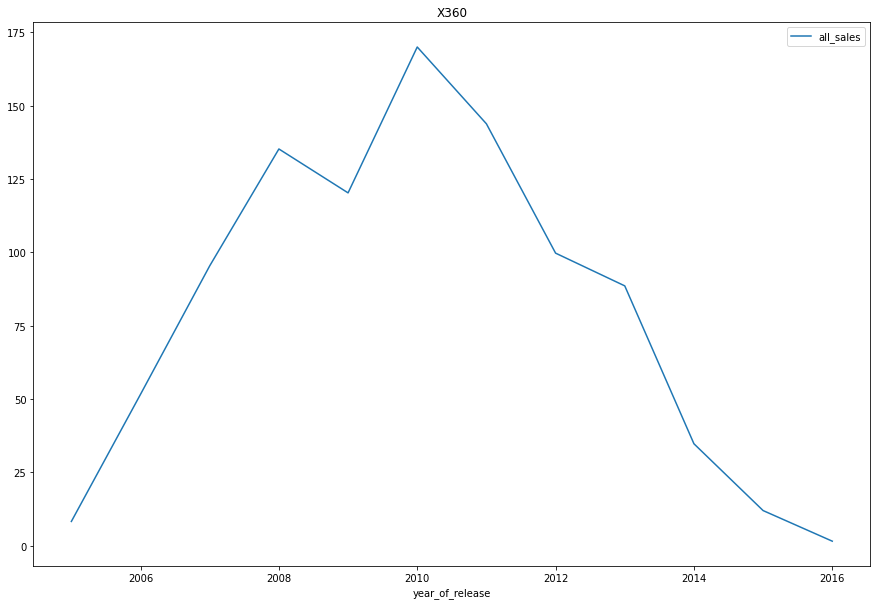

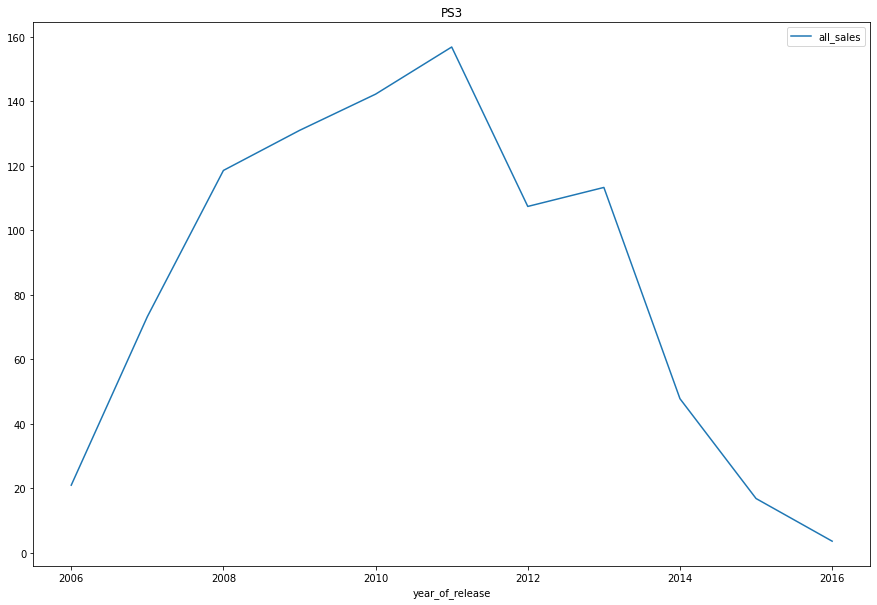

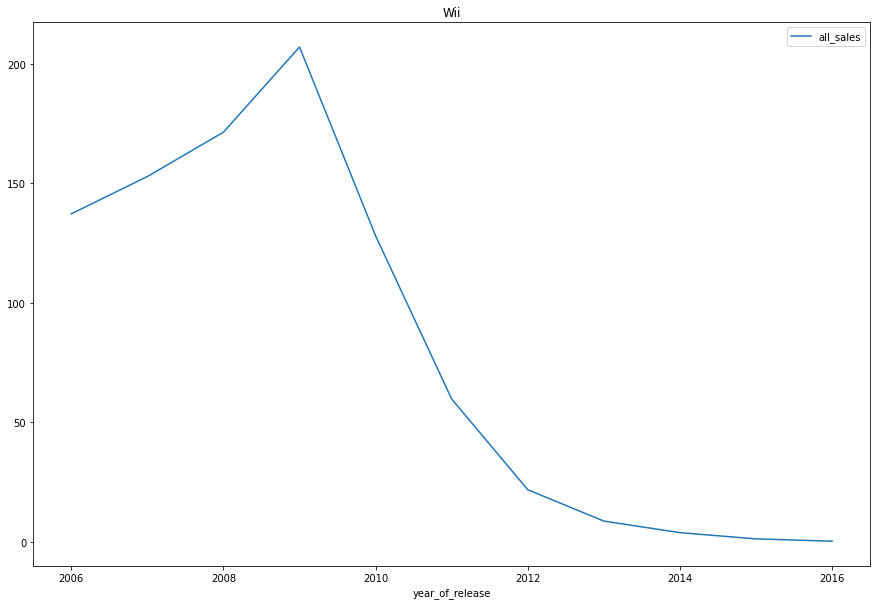

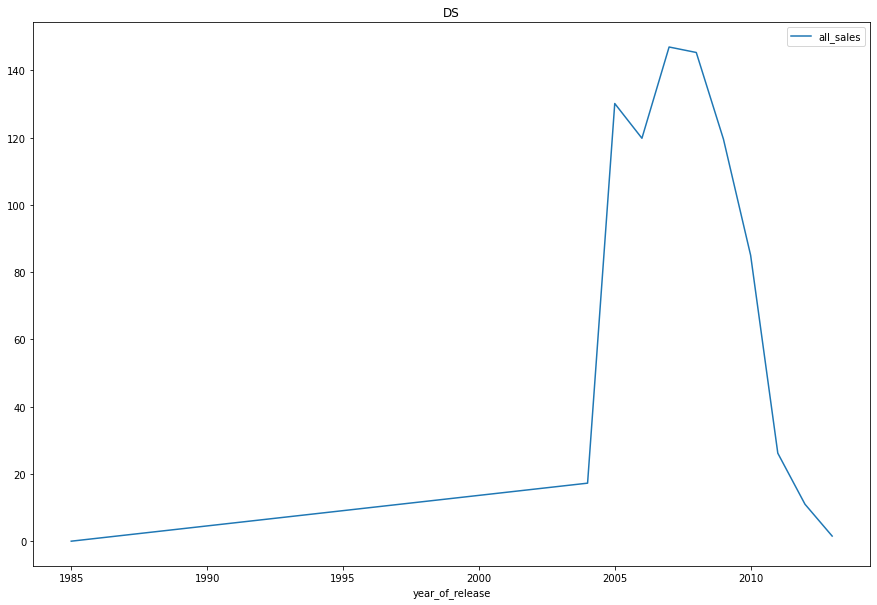

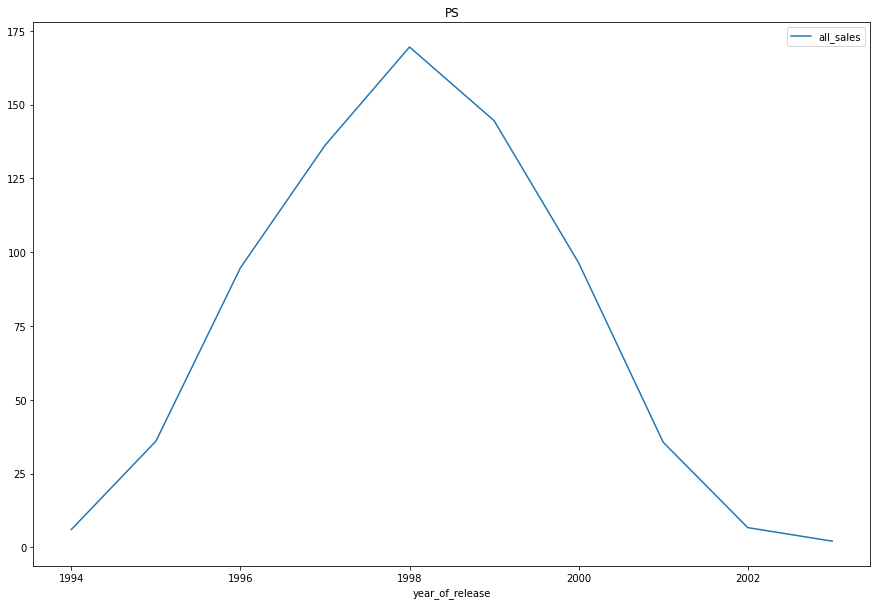

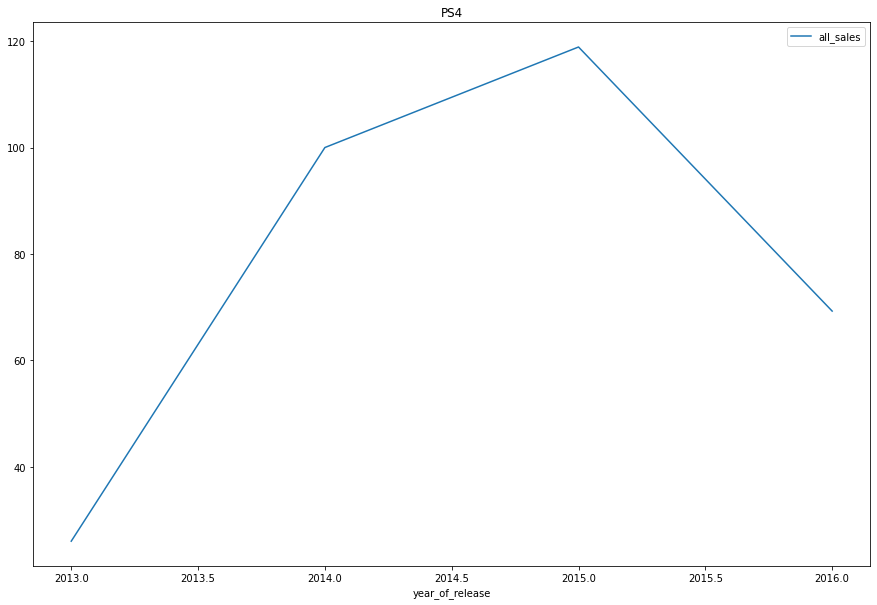

In [29]:
for platform in top_7_platforms:
    platform_sales = pd.pivot_table(data.query('platform == @platform'), index = 'year_of_release', values = 'all_sales', aggfunc = 'sum')
    platform_sales.plot(figsize = (15, 10));
    plt.title(platform)

**Вывод**

На основе таблицы было выделено 7 топ платформ:

* PS2 1233.56
* X360 961.24
* PS3 931.34
* Wii 891.18
* DS 802.78
* PS 727.58
* PS4 314.14

Хочу обратить внимание что между PS и PS4 большой разрыв. Именно по этому мой топ оканчивается здесь.

Что же косаемо графиком, можем выделить следующиее: 

PS2. Резкий скачок продаж наблюдается с 2000 по 2002 гг. В 2004 год пик, Затем продажи постепенно падают, от части связано с тем, что в 2006 году вышла PS3, но даже не смотря на это продажи продолжались, наверняка с выходом новой консоли старая стала стоить дешевле, а поддержка старой версии от разработчиков еще была.

X360. 2005-2008 продажи расли, пик был достигнут в 2010 году после спада продаж в 2009, вероятно подъем связан в выходом популярных игр.

PS3. Рост продаж с 2006 по 2011 гг. Затем стали падать с небольшим плато в районе 2012-2013 годов.

Wii. Высокий старт продаж среди других платформ. Несмотря на медленный рост с 2006 по 200 9 гг по пиковой сумме опередила некоторые другие платформы. Затем продажи стали резко падать. Наверняка это связано с отсутствием выхода популярных игр.

Nintendo DS. Резкий рост продаж с 2004 по 2005 года. Далее медленный рост до 2008 года, после которого начался постепенный спад продаж.

PS. Иммет стабильно постепенный рост в 1994 - 1998 гг и затем зеркальный спад.

PS4. Уверенный рост с момента выхода и до 2015 года, далее спад. 

По всем платформам наблюдается тенденция резких стартов продаж, затем падение после выхода консоли нового поколения, но вместе с этим выгода купить старую модель плюс поддержка старых моделей разработчиками помогает добиться плавности спада продаж.

### Теперь дадим ответ на вопрос "За какой характерный срок появляются новые и исчезают старые платформы?"

Для этого ответа построим графики по основным проиводителям SONY (серия PlayStation) и MICROSOFT (Серия Xbox)

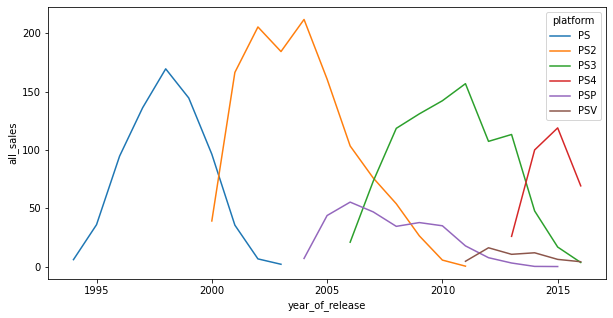

In [30]:
ps_list = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
ps_salles = pd.DataFrame(data.query('platform in @ps_list'))
ps_salles_all = ps_salles.groupby(['platform', 'year_of_release'])[['all_sales']].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x='year_of_release',y='all_sales', hue='platform', data=ps_salles_all.reset_index());

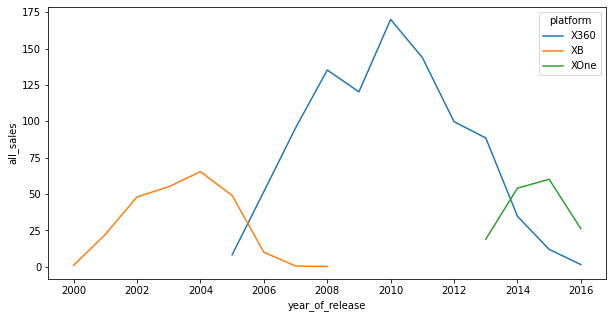

In [31]:
xbox_list = ['X360', 'XB', 'XOne']
xbox_salles = pd.DataFrame(data.query('platform in @xbox_list'))
xbox_salles_all = xbox_salles.groupby(['platform', 'year_of_release'])[['all_sales']].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x='year_of_release',y='all_sales', hue='platform', data=xbox_salles_all.reset_index());

**Вывод**

Консоли от SONY появляются раз в 5 лет. У MICROSOFT разброс от 5 до 8 лет. Среднее время появление новой консоли примерно 6 лет.

### Актуальный период

Возьмем данные за соответствующий актуальный период. Актуальный период у нас будет с 2013 года. Так как уже более 3-х лет на рынке есть PS4 и Xbox One, и консолей нового покаления в ближайшие пару лет не предвидется. 

In [32]:
#Выделим актуальный период в отдельную переменную
current_data = data[data['year_of_release']>2013]
display (current_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


In [33]:
current_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    Int64  
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  all_sales        1689 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 174.8+ KB


In [34]:
current_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,718.000000,888.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,72.306407,6.623536,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,12.213500,1.589792,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


Выясним, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

Для начала изучим данные по продажам за актуальный период.

In [35]:
current_data_sales = pd.pivot_table(current_data, index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum' )
display (current_data_sales)

all_sales
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14
PC       2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2014                100.00
         2015                118.90
         2016                 69.25
PSP      2014                  0.24
         2015                  0.12
PSV      2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

In [36]:
current_data_sales_platform = pd.pivot_table(current_data_sales, index = 'platform', values = 'all_sales', aggfunc = 'sum')
current_data_sales_platform.sort_values('all_sales', ascending=False)

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


**Вывод**

Почти у всех консолей продажи падают после 2014 гг.

Лидер продаж PS4, хотя в предверии PS5 продажи падают, но всё равно платформа прибыльная. 

Также и XOne, несмотря на то, что продаж меньше в 2 раза.

Nintendo 3DS имеет третье место по продажам за актуальный переиод. Это портативная консоль, а конкуренты такие как PSP, PSV, WiiU имееют горазды меньшие продажи, поэтому считаю платформу прибыльной.

Продажи на консолях PS3, X360, Wii в конце актуального периода снизились до минимума. Данные консоли уже не актуальны соотвественно, не прибыльны.

Продажи игр не PC довольно тяжело оценить, ведь PC можно модернизировать во время использования и сделать актуальным, несмотря на это имеет низкие продажи. Но на мой взгляд эта платформа всегда будет актуальна.


### Построим "Ящик с усами" по глобальным продажам игр в разбивке по платформам.


<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

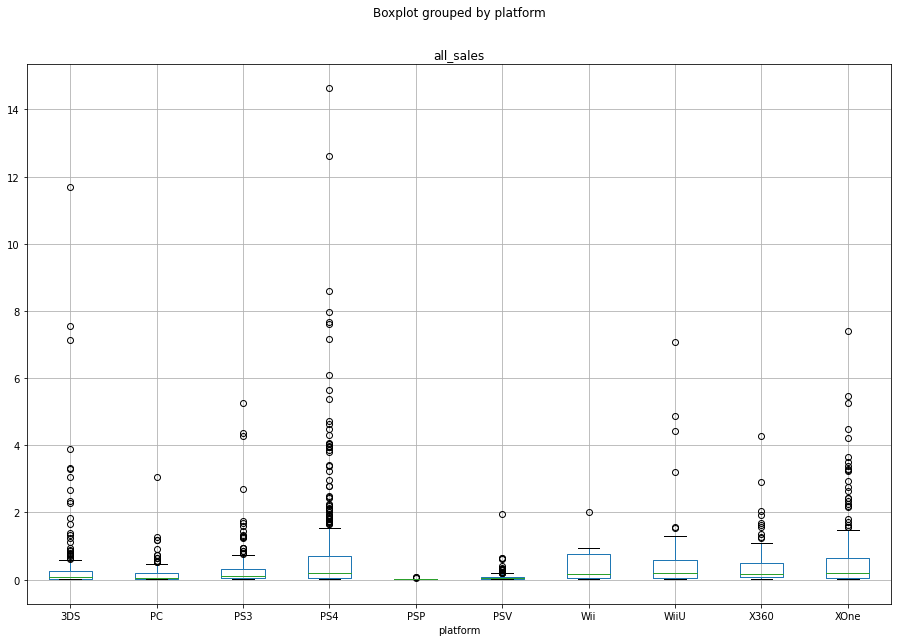

In [39]:
current_data.boxplot(by='platform', column='all_sales', figsize=(15,10))

**Вывод**

Разница в основном незначительна. С 1 по 3 квартиль разные платформы демонстрируют похожие продажи. То есть медианные продажи не будут сильно различаться, чего не скажешь о средних. На боксплотах наверху можно наблюдать какой серьезный выброс есть у Wii. Возможно это какая то игра, которая обогнала все остальные, но я к сожелению не в курсе что это.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

,all_sales,critic_score,user_score
all_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


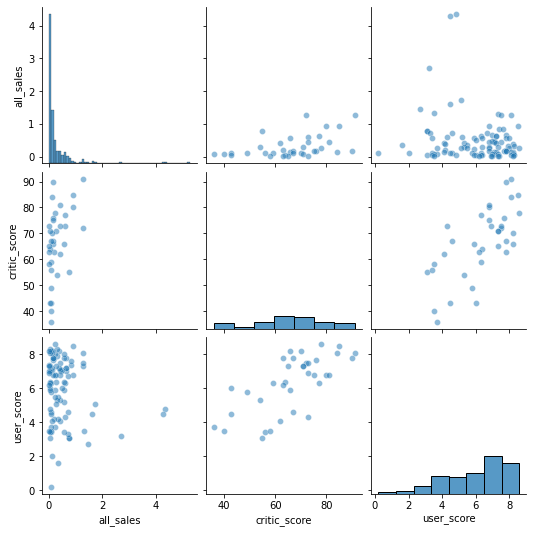

In [38]:
current_data_ps3 = current_data[current_data['platform'] == 'PS3']
current_data_ps3 = current_data_ps3.loc[:,['all_sales', 'critic_score', 'user_score']]
display (current_data_ps3.corr())
sns.pairplot(current_data_ps3, plot_kws={'alpha': 0.5});

,all_sales,critic_score,user_score
all_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


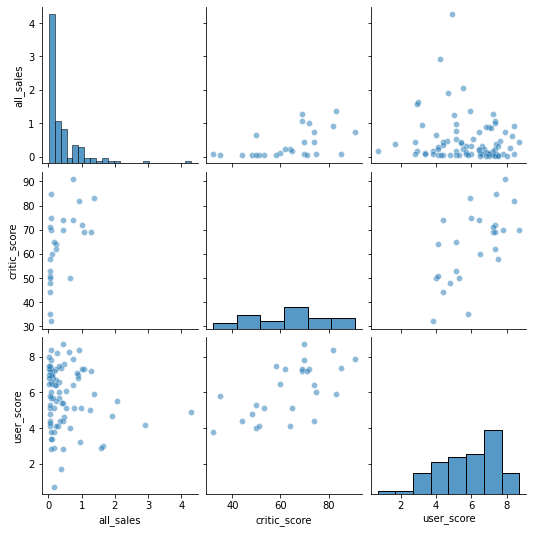

In [39]:
current_data_x360 = current_data[current_data['platform'] == 'X360']
current_data_x360 = current_data_x360.loc[:,['all_sales', 'critic_score', 'user_score']]
display(current_data_x360.corr())
sns.pairplot(current_data_x360, plot_kws={'alpha': 0.5});

,all_sales,critic_score,user_score
all_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


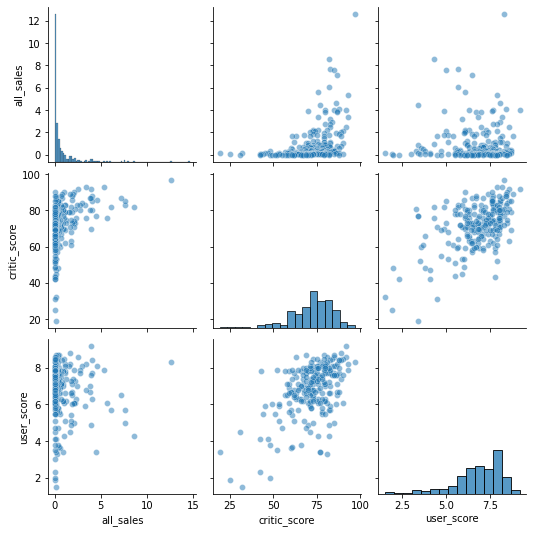

In [40]:
current_data_ps4 = current_data[current_data['platform'] == 'PS4']
current_data_ps4 = current_data_ps4.loc[:,['all_sales', 'critic_score', 'user_score']]
display(current_data_ps4.corr())
sns.pairplot(current_data_ps4, plot_kws={'alpha': 0.5});

,all_sales,critic_score,user_score
all_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


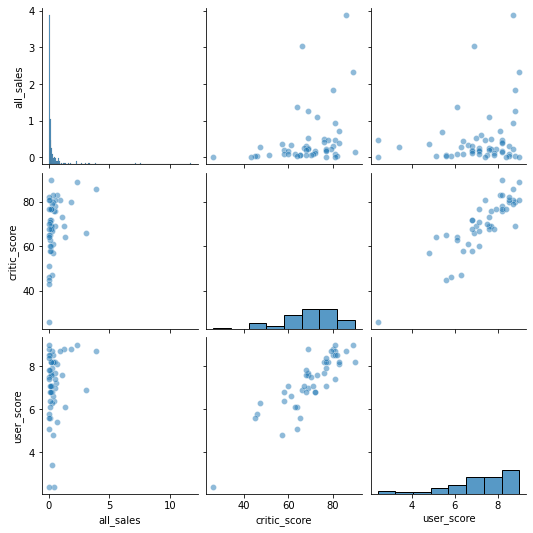

In [41]:
current_data_3ds = current_data[current_data['platform'] == '3DS']
current_data_3ds = current_data_3ds.loc[:,['all_sales', 'critic_score', 'user_score']]
display(current_data_3ds.corr())
sns.pairplot(current_data_3ds, plot_kws={'alpha': 0.5});

,all_sales,critic_score,user_score
all_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


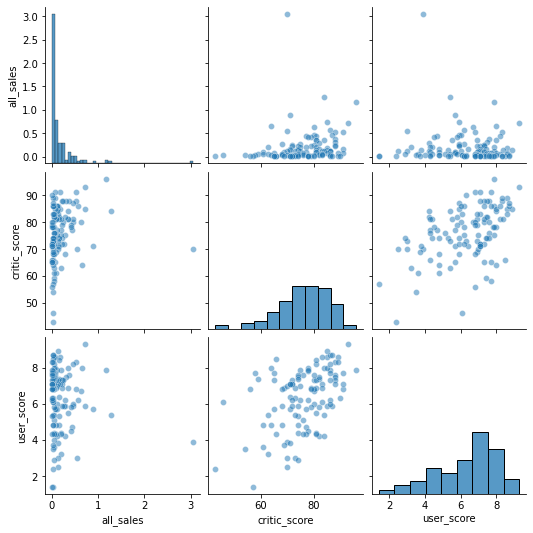

In [42]:
current_data_pc = current_data[current_data['platform'] == 'PC']
current_data_pc = current_data_pc.loc[:,['all_sales', 'critic_score', 'user_score']]
display(current_data_pc.corr())
sns.pairplot(current_data_pc, plot_kws={'alpha': 0.5});

**Вывод**

Чем выше оценка критиков и пользователей тем больше продажи.

Оценки критиков и пользователей в большинстве случаев схожи. По всем проверенным платформам продажи растут у тех игр, у которых оценка критиков выше, при этом оценки пользователей наоборот, они почти не оказывают влияния на продажи для топовых платформ. Оценки критиков и пользователей имеют линейную зависимость, то есть в большинстве случаев они схожи. Явный рост продаж у тех игр у которых оценка критиков выше 50.

### Посмотрим теперь на общее распределение игр по жанрам.

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [43]:
current_data_genre = pd.pivot_table(current_data, index='genre', values='all_sales', aggfunc={'all_sales': ['sum', 'mean', 'median']})
display(current_data_genre.sort_values('mean', ascending=False))
display(current_data_genre.sort_values('median', ascending=False))
display(current_data_genre.sort_values('sum', ascending=False))

,mean,median,sum
genre,,,
Shooter,1.335469,0.515,170.94
Sports,0.680000,0.180,109.48
Platform,0.476053,0.140,18.09
Fighting,0.470333,0.125,28.22
Role-Playing,0.459005,0.110,101.44
Racing,0.398841,0.090,27.52
Misc,0.332301,0.090,37.55
Action,0.322068,0.090,199.36
Simulation,0.298409,0.100,13.13


,mean,median,sum
genre,,,
Shooter,1.335469,0.515,170.94
Sports,0.680000,0.180,109.48
Platform,0.476053,0.140,18.09
Fighting,0.470333,0.125,28.22
Role-Playing,0.459005,0.110,101.44
Simulation,0.298409,0.100,13.13
Action,0.322068,0.090,199.36
Misc,0.332301,0.090,37.55
Racing,0.398841,0.090,27.52


,mean,median,sum
genre,,,
Action,0.322068,0.090,199.36
Shooter,1.335469,0.515,170.94
Sports,0.680000,0.180,109.48
Role-Playing,0.459005,0.110,101.44
Misc,0.332301,0.090,37.55
Fighting,0.470333,0.125,28.22
Racing,0.398841,0.090,27.52
Platform,0.476053,0.140,18.09
Adventure,0.094865,0.030,17.55


**Вывод**

Самый популярный жанр среди продаж "Action" и "Shooter", чуть ниже "Sports" и "Role-Playing". На последнем месте жанр "Puzzle".

## Шаг 4. Составим портрет пользователя каждого региона

### Определим портрет пользователя каждого региона, а именно Северная Америка, Европа, Япония и остальной мир.

* Самые популярные платформы (топ-5).
* Самые популярные жарны (топ-5)
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?



**Северная Америка**

In [44]:
#Выделим регион в отдельную переменную
current_data_na = current_data.query('na_sales > 0')
current_data_na

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16528,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01
16551,Farming Simulator 2014,PSV,2014,Simulation,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01
16616,Xblaze: Lost Memories,PSV,2015,Adventure,0.01,0.00,0.00,0.00,<NA>,7.0,M,0.01
16658,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,NaN,0.01


In [45]:
current_data_na.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,981.000000,981.000000,981.000000,981.000000,981.000000,571.000000,713.000000,981.000000
mean,2014.903160,0.289562,0.266228,0.053170,0.082334,72.858144,6.573492,0.691295
std,0.814286,0.554658,0.589658,0.239775,0.178479,12.370417,1.592472,1.319362
min,2014.000000,0.010000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,67.000000,5.700000,0.090000
50%,2015.000000,0.090000,0.090000,0.000000,0.030000,75.000000,7.000000,0.250000
75%,2016.000000,0.290000,0.250000,0.030000,0.070000,81.000000,7.800000,0.660000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


In [46]:
current_data_na_platform = pd.pivot_table(current_data_na, index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
current_data_na_platform

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


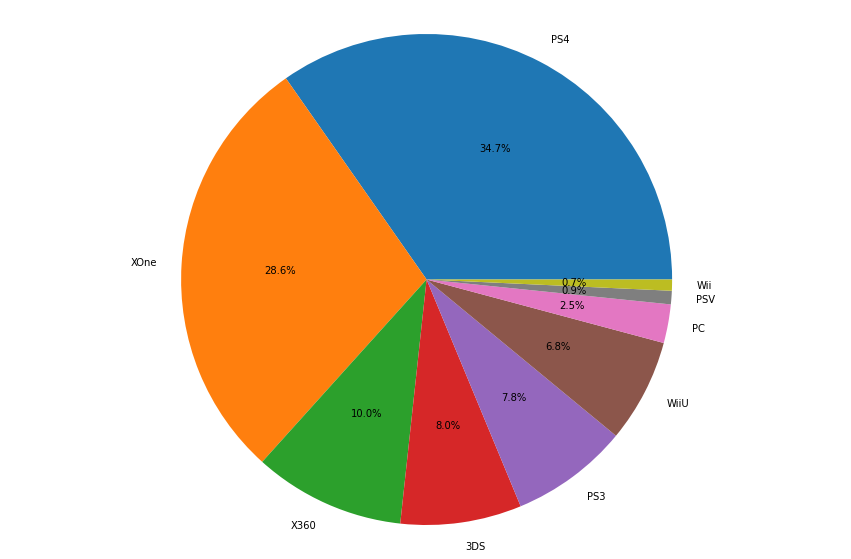

In [47]:
plt.figure(figsize=(15,10))
current_data_na_platform_graph = current_data_na_platform.reset_index()
plt.pie(current_data_na_platform_graph['na_sales'],labels=current_data_na_platform_graph['platform'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [48]:
current_period_na_genre = pd.pivot_table(current_data_na, index = 'genre', values='na_sales', aggfunc='sum').sort_values(
    'na_sales', ascending = False)
current_period_na_genre

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


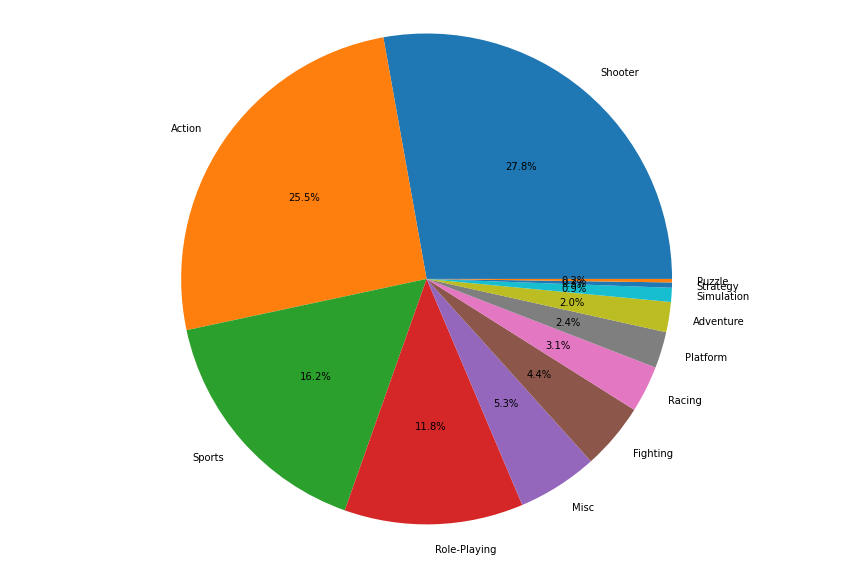

In [49]:
plt.figure(figsize=(15,10))
current_period_na_genre_graph = current_period_na_genre.reset_index()
plt.pie(current_period_na_genre_graph['na_sales'], labels=current_period_na_genre_graph['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [50]:
current_data_na_r = pd.pivot_table(current_data_na, index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
current_data_na_r

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


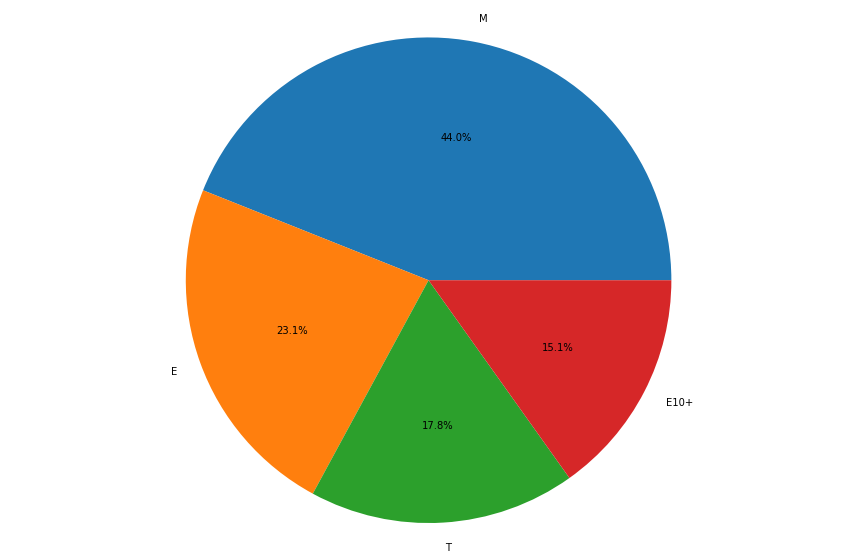

In [51]:
plt.figure(figsize=(15,10))
current_data_na_r_graph = current_data_na_r.reset_index()
plt.pie(current_data_na_r_graph['na_sales'],labels=current_data_na_r_graph['rating'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

**Вывод**

Среднестатистический геймер В Северной Америке владеет PS4 или Xbox One. 

Предпочитает игры в жанре Shooter или Action.

Топ 5 платформ:
* PS4
* Xbox One
* Xbox 360
* 3DS
* PS3

Топ 5 жанров:
* Shooter
* Action
* Sports
* Role-Playing
* Misc

В этом регионе сильно влияет рейтинг "М" на продажи игр.


**Европа**


In [52]:
#Так же выделим регион в отдльную переменную
current_data_eu = current_data.query('eu_sales>0')
current_data_eu

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16641,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,<NA>,6.6,E,0.01
16643,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16650,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01
16672,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01


In [53]:
current_data_eu.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,626.000000,774.000000,1067.000000
mean,2014.891284,0.259831,0.253683,0.047020,0.075286,72.878594,6.574419,0.635820
std,0.792430,0.539576,0.566914,0.210831,0.172613,12.374087,1.582984,1.274901
min,2014.000000,0.000000,0.010000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.010000,0.030000,0.000000,0.010000,67.000000,5.700000,0.070000
50%,2015.000000,0.080000,0.080000,0.000000,0.020000,74.000000,6.900000,0.210000
75%,2016.000000,0.260000,0.230000,0.020000,0.060000,81.000000,7.800000,0.610000
max,2016.000000,6.030000,6.310000,3.100000,2.380000,97.000000,9.300000,14.630000


In [54]:
current_data_eu_platform = pd.pivot_table(current_data_eu, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
current_data_eu_platform

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


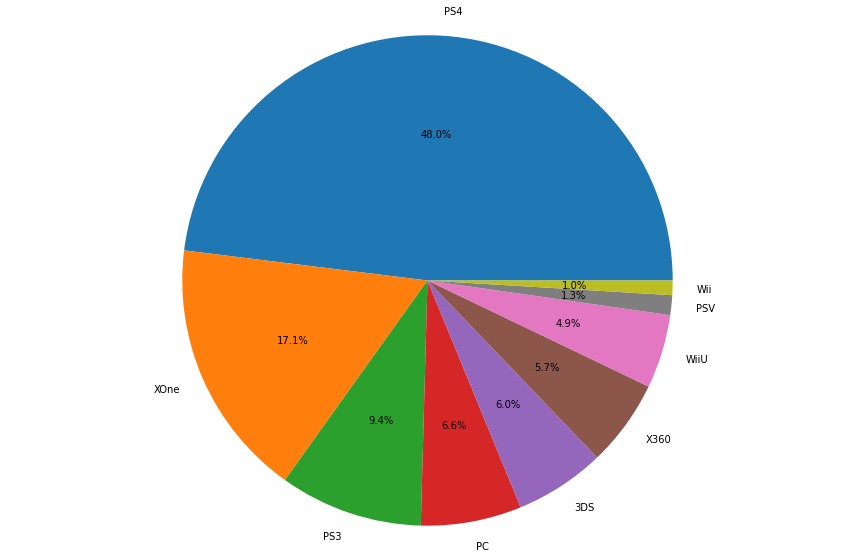

In [55]:
plt.figure(figsize=(15,10))
current_data_eu_platform_graph = current_data_eu_platform.reset_index()
plt.pie(current_data_eu_platform_graph['eu_sales'],labels=current_data_eu_platform_graph['platform'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [56]:
current_data_eu_genre = pd.pivot_table(current_data_eu, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
current_data_eu_genre

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


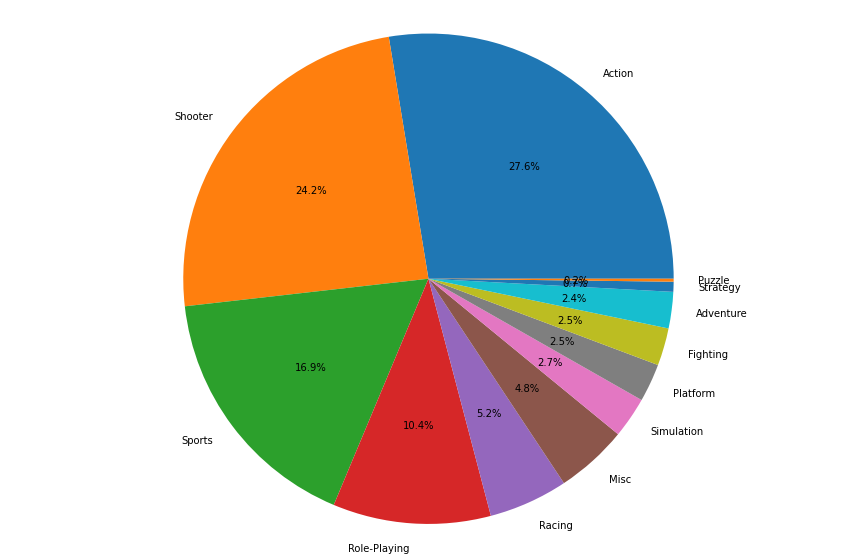

In [57]:
plt.figure(figsize=(15,10))
current_data_eu_genre_graph = current_data_eu_genre.reset_index()
plt.pie(current_data_eu_genre_graph['eu_sales'],labels=current_data_eu_genre_graph['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [58]:
current_data_eu_r = pd.pivot_table(current_data_eu, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
current_data_eu_r

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


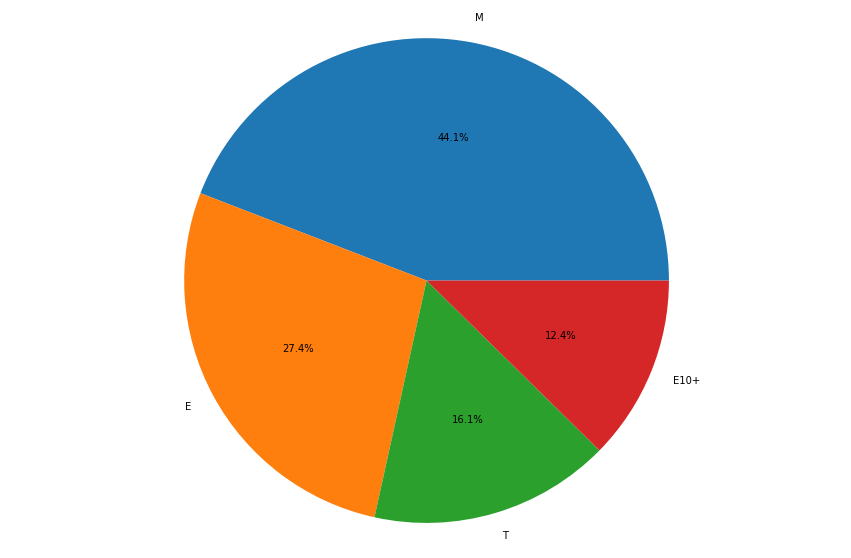

In [59]:
plt.figure(figsize=(15,10))
current_data_eu_r_graph = current_data_eu_r.reset_index()
plt.pie(current_data_eu_r_graph['eu_sales'],labels=current_data_eu_r_graph['rating'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

**Вывод**

Среднестатистический геймер в Европе мало чем отличается от геймера в Северной Америке. 
Он так же владеет PS4, предпочитает игры жанра Shooter или Action.

Топ 5 платформ:

* PS4
* Xbox One
* PS3
* PC
* 3DS

Топ 5 жанров:

* Action
* Shooter
* Sports
* Role-Playing
* Racing

В этом регионе так же сильнови влияет рейтинг "M" на продажи видеоигр.

**Япония**

In [60]:
#Выделяем регион в отдельную переменную
current_data_jp = current_data.query('jp_sales>0')
current_data_jp

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


In [61]:
current_data_jp.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,873.000000,873.000000,873.000000,873.000000,873.000000,278.000000,327.000000,873.000000
mean,2014.917526,0.179782,0.197766,0.106632,0.062027,74.471223,7.178287,0.546208
std,0.785521,0.530840,0.607344,0.284786,0.185348,9.642204,1.254190,1.352311
min,2014.000000,0.000000,0.000000,0.010000,0.000000,43.000000,3.100000,0.010000
25%,2014.000000,0.000000,0.000000,0.020000,0.000000,68.000000,6.600000,0.030000
50%,2015.000000,0.000000,0.000000,0.040000,0.000000,75.000000,7.500000,0.090000
75%,2016.000000,0.090000,0.110000,0.100000,0.030000,82.000000,8.050000,0.370000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


In [62]:
current_data_jp_platform = pd.pivot_table(current_data_jp, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
current_data_jp_platform

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08


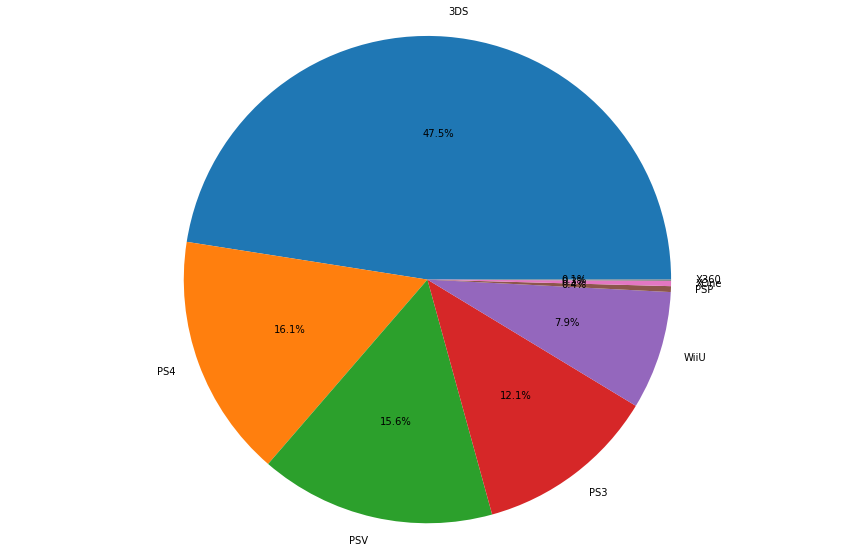

In [63]:
plt.figure(figsize=(15,10))
current_data_jp_platform_graph = current_data_jp_platform.reset_index()
plt.pie(current_data_jp_platform_graph['jp_sales'],labels=current_data_jp_platform_graph['platform'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [64]:
current_data_jp_genre = pd.pivot_table(current_data_jp, index='genre', values='jp_sales', aggfunc='sum').sort_values(
    'jp_sales', ascending=False)
current_data_jp_genre

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


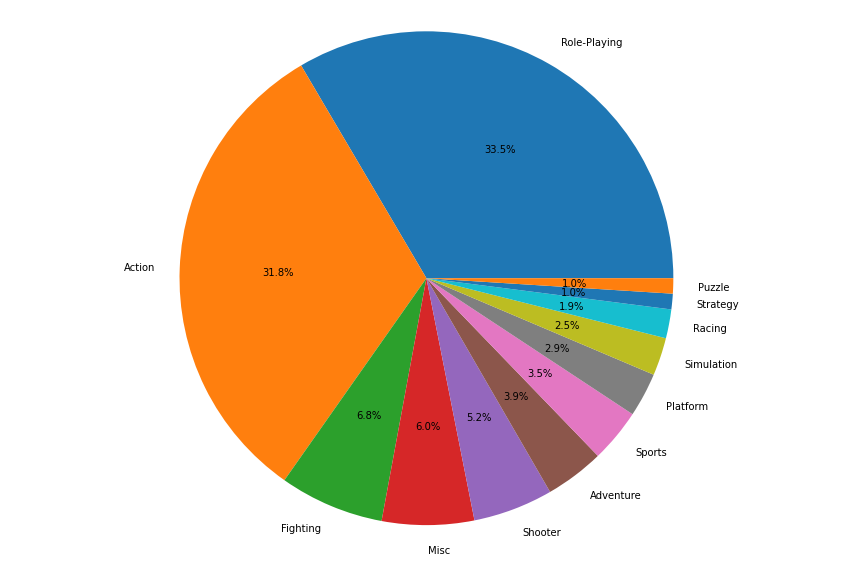

In [65]:
plt.figure(figsize=(15,10))
current_data_jp_genre_graph = current_data_jp_genre.reset_index()
plt.pie(current_data_jp_genre_graph['jp_sales'],labels=current_data_jp_genre_graph['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [66]:
current_data_jp_r = pd.pivot_table(current_data_jp, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
current_data_jp_r

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


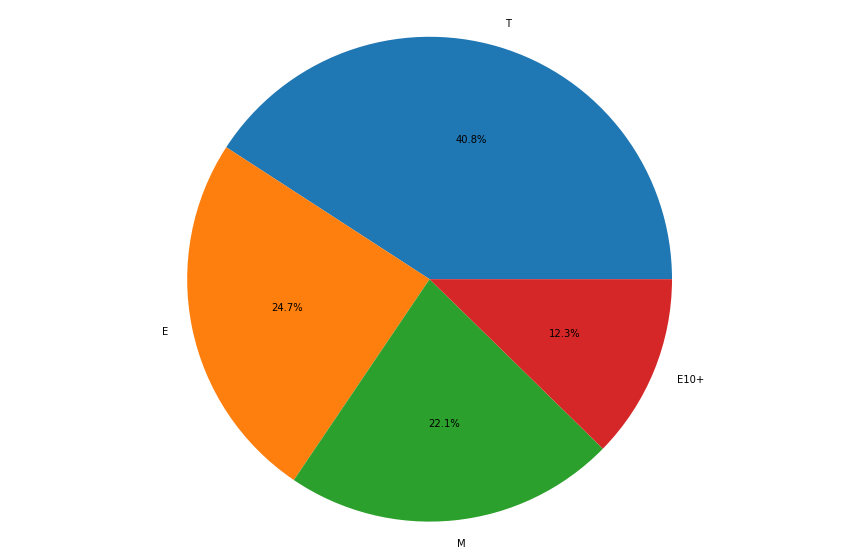

In [67]:
plt.figure(figsize=(15,10))
current_data_jp_r_graph = current_data_jp_r.reset_index()
plt.pie(current_data_jp_r_graph['jp_sales'],labels=current_data_jp_r_graph['rating'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

**Вывод**

Среднестатистический геймер в Японии предпочитаем 3DS в отличии от своих "коллег" в Европе и США. Да предпочитаемые жанры игр тоже отличаются. На продажу игр влияет рейтинга "T".

Популярные платформы:

* 3DS
* PS4
* PSV
* PS3
* WiiU

Популярные жанры:

* Role-Playing
* Action
* Fighting
* Misc
* Shooter



**Остальной мир**

In [68]:
#Так же выделим регион в отдельную переменную
current_data_other = current_data.query('other_sales > 0')
current_data_other

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
14542,Looney Tunes: Galactic Sports,PSV,2015,Action,0.00,0.02,0.00,0.01,<NA>,NaN,NaN,0.03
14705,Superdimension Neptune vs Sega Hard Girls,PSV,2016,Role-Playing,0.00,0.02,0.00,0.01,73,8.4,T,0.03
14869,Resident Evil 5 HD,PS4,2016,Action,0.02,0.00,0.00,0.01,<NA>,NaN,NaN,0.03
14870,Aegis of Earth: Protonovus Assault,PSV,2016,Action,0.01,0.01,0.00,0.01,<NA>,8.3,T,0.03


In [69]:
current_data_other.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,920.000000,920.000000,920.000000,920.000000,920.000000,547.000000,679.000000,920.000000
mean,2014.842391,0.306250,0.288859,0.057750,0.088717,73.862888,6.604713,0.741576
std,0.786271,0.568862,0.603169,0.247521,0.182593,11.654105,1.585426,1.348107
min,2014.000000,0.000000,0.000000,0.000000,0.010000,19.000000,0.200000,0.030000
25%,2014.000000,0.040000,0.040000,0.000000,0.010000,68.500000,5.800000,0.120000
50%,2015.000000,0.100000,0.110000,0.000000,0.030000,75.000000,7.000000,0.290000
75%,2015.000000,0.320000,0.270000,0.032500,0.080000,82.000000,7.800000,0.712500
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


In [70]:
current_data_other_platform = pd.pivot_table(current_data_eu, index='platform', values='other_sales', aggfunc='sum').sort_values(
    'other_sales', ascending=False)
current_data_other_platform

,other_sales
platform,
PS4,43.81
XOne,12.48
PS3,9.14
X360,4.27
3DS,3.59
WiiU,3.13
PC,1.85
PSV,1.66
Wii,0.40


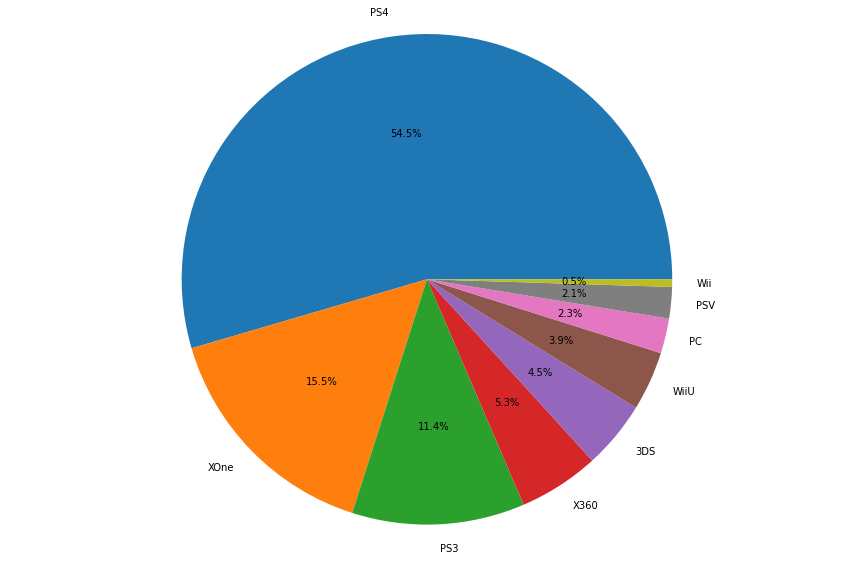

In [71]:
plt.figure(figsize=(15,10))
current_data_other_platform_graph = current_data_other_platform.reset_index()
plt.pie(current_data_other_platform_graph['other_sales'],labels=current_data_other_platform_graph['platform'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [72]:
current_data_other_genre = pd.pivot_table(current_data_other, index='genre', values='other_sales',
                                        aggfunc='sum').sort_values('other_sales', ascending=False)
current_data_other_genre

,other_sales
genre,
Action,22.57
Shooter,21.53
Sports,14.36
Role-Playing,8.64
Misc,4.03
Racing,2.89
Fighting,2.73
Adventure,1.82
Platform,1.81


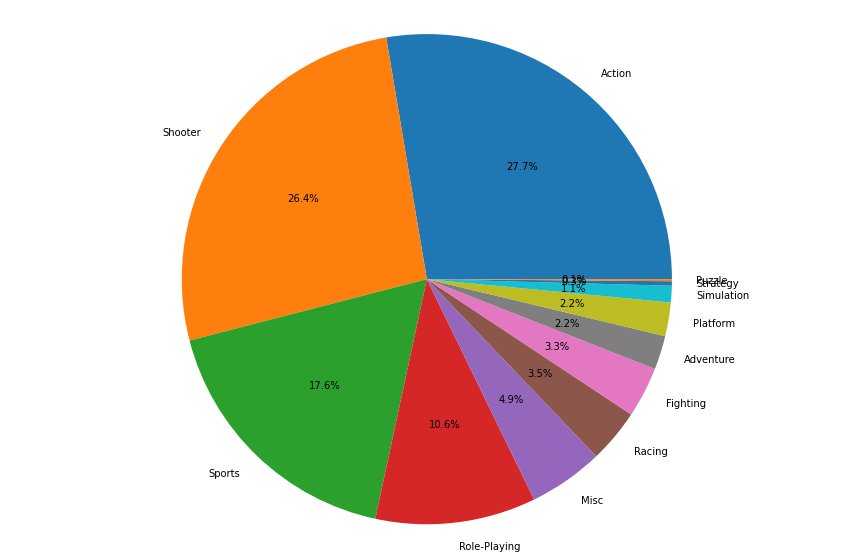

In [73]:
plt.figure(figsize=(15,10))
current_data_other_genre_graph = current_data_other_genre.reset_index()
plt.pie(current_data_other_genre_graph['other_sales'],labels=current_data_other_genre_graph['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [74]:
current_data_other_r = pd.pivot_table(current_data_other, index='rating', values='other_sales',
                                        aggfunc='sum').sort_values('other_sales', ascending=False)
current_data_other_r

,other_sales
rating,
M,28.67
E,15.39
T,11.33
E10+,7.83


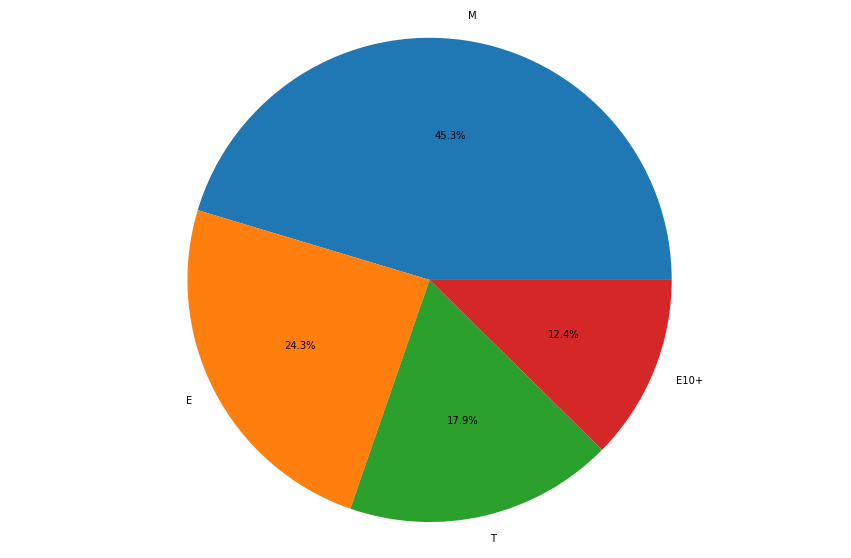

In [75]:
plt.figure(figsize=(15,10))
current_data_other_r_graph = current_data_other_r.reset_index()
plt.pie(current_data_other_r_graph['other_sales'], labels=current_data_other_r_graph['rating'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

**Вывод**

Среднестатистический геймер в остальном мире похож на геймера из Европы или США. Владеет или PS4 или Xbox One. Gедпочитает игры жанра Action или Shooter.

Популярные платформы:

* PS4
* XOne
* PS3
* X360
* 3DS

Популярные жанры:

* Action
* Shooter
* Sports
* Role-Playing
* Misc

На продажу игры влияет рейтинг "M".

### Общий вывод


Исходя из полученнух данных можно сказать, что геймеры по всему миру, кроме Японии предпочитают играть на PS4 в Action или Shooter с рейтингом "М".
Отличается только Япония, там геймеры играют на 3DS в RPG или Action с рейтингом "T".

##  Шаг 5. Проверка гипотез

### Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


In [76]:
#Выделим в отдельные переменные Xbox One 
xbox_one = current_data.query('platform == "XOne"')
xbox_one = xbox_one[xbox_one['user_score'].notna()]
xbox_one['user_score'].describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [77]:
#И пользователей ПК
pc = current_data.query('platform == "PC"')
pc = pc[pc['user_score'].notna()]
pc['user_score'].describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Из описания столбцов можно сделать предварительный вывод: средние значения у Xbox One и Персонального Копьютера  довольно близки.

**Проверка гипотезы**

* Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны.

* Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не равны.

Коэффициент **alpha** будет стандартным, классическим равным 5% (0.05)

In [78]:
alpha = 0.05

results = st.ttest_ind(xbox_one['user_score'], pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Делаем вывод,** что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтвердилась. Это означает, что пользователи ставят примерно одинаковые оценки играм на плаформах PC и Xbox One.

### Гипотеза №1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [79]:
#Аналогично выделяем переменные для жанров
action = current_data.query('genre == "Action"')
action = action[action['user_score'].notna()]
action['user_score'].describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [80]:
sports = current_data.query('genre == "Sports"')
sports = sports[sports['user_score'].notna()]
sports['user_score'].describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

**Вывод:** Здесь средние значения отличаются.

**Проверка гипотезы.**

* Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны.
* Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны.

Коэффициент **alpha** будет равен 5%.

In [81]:
alpha = 0.05

results = st.ttest_ind(action['user_score'], sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Вывод**

Эта гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные - не подтвердилась. 
Средние этих выборок различаются. Это говорит нам о том, что пользователи ставят разные оценки играм с жанрами Action и Sports.

## Шаг 6. Общий вывод

Исходные данные представляют собой двумерную таблицу с 16715 записями и 11 признаками (столбцами). При первоначальном анализе было обнаружено больше количество пропусков в столбцах с рейнигом, годом издания игры, оценками критиков и оценками пользователей. 

Названия столбцов приведен к нижнему регистру, тип данных заменен. Обработаны аномалии, те, что не пригодились удалены (приблизительно 1,6 % данных, что не критично).

Были даны ответы на поставленные вопросы, комментарии даны по ходу исследования.

Самая прибыльная консоль PS4, так же она является самой популярной у пользователей всего мира, кроме Японии. 
Самый популрный жанр Action с рейтингом "М", и в с рейтингом "T" в Японии.
Было выявлено, что продажи игр зависят от платформы, жанра, а также рейтинга критиков и оценки пользователей.

Рекоммендации для кампании на 2017 год.

Считаю надо сделать ставку на консоли нового поколения в зависимости от популрянх консолей в регионе. Такая же ситуация с жанром и возростному рейтингу. Судя по полуярности рейтинга M - основная часть геймеров старше 17 лет. Также стоит учитывать рейтинг критиков на вышедшую игру, чем он выше тем больше будет продаж.
Стоит учесть, что в конце актуального периода продажи игра падали по всем платформам, вероятно выручка в 2017 году будет меньше чем в 2016 пока не появятся консоли нового поколения,т.к. после выхода новых консолей резко начинают расти продажи игр. Заранее заключать договора на поставку игр в магазин.
Можно отметить, что стиабильными являются продажи игр на платформе PC.
